#Data Preprocessing

In [92]:
#Pranav Kumar Reddy Veldurthi

In [96]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical

In [97]:
from keras.datasets import fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()
var_num = 784
xtrain = np.round(xtrain / 27).astype(int);
xtest = np.round(xtest / 27).astype(int);

xtrain_flat = np.reshape(xtrain, (-1,var_num))
xtest_flat = np.reshape(xtest, (-1,var_num)) 

In [98]:
import tensorflow as tf
train_size = xtrain_flat.shape[0]
batch_size = 100
train_dataset = (tf.data.Dataset.from_tensor_slices(xtrain_flat).shuffle(train_size).batch(batch_size))

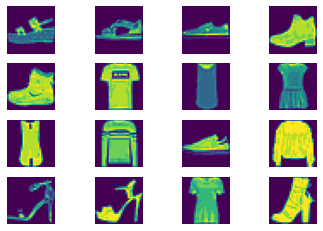

In [99]:
def draw_grid(imlist, m, n):
  fig, grid = plt.subplots(m,n) 
  for i in range(m):
    for j in range(n):
      grid[i,j].axis('off')
      grid[i,j].imshow(np.reshape(imlist[(i-1)*m+j], (28,28)))
    
draw_grid(xtrain[:16], 4,4)

In [131]:
lstm_len=100
Xtrain=[]
Ytrain=[]
for i in range(len(xtrain_flat)//10):
  for j in range(0,784-lstm_len):
    x=xtrain_flat[i][j:j+lstm_len]
    y=xtrain_flat[i][j+lstm_len]
    Xtrain.append(x)
    Ytrain.append(y)
print(len(Xtrain))

4104000


In [132]:
Xtrain = np.reshape(Xtrain, (len(Xtrain), lstm_len, 1))
Ytrain = to_categorical(Ytrain)

In [134]:
Xtrain.shape

(4104000, 100, 1)

In [133]:
Ytrain.shape

(4104000, 10)

In [135]:
Ytrain[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Model

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint

In [137]:
model = Sequential()
model.add(LSTM(256, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(Ytrain.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [138]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 266,762
Trainable params: 266,762
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.fit(Xtrain, Ytrain, epochs=1, batch_size=128)

32060/32063 [============================>.] - ETA: 0s - loss: 0.7597
Epoch 1: loss did not improve from 0.75076
32063/32063 [==============================] - 278s 9ms/step - loss: 0.7597


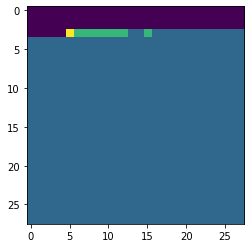

In [94]:
input_seed = np.random.randint(0, len(xtrain_flat)/100-1)
input=xtrain_flat[input_seed][:lstm_len]
image=input
for i in range(784-lstm_len):
  x = np.reshape(input, (1, len(input), 1))
  prediction = model.predict(x)
  pixel = np.argmax(prediction)
  image=np.append(image, pixel)
  input=np.append(input, pixel)
  input = input[1:len(input)]
image_dense=np.reshape(image,(28,28))
from matplotlib import pyplot as plt
plt.imshow(image_dense)
plt.show()

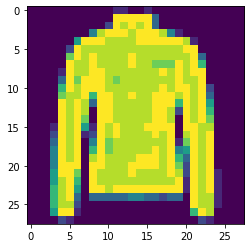

In [91]:
original_image=np.reshape(xtrain_flat[input_seed],(28,28))
plt.imshow(original_image)
plt.show()